# Automatic sleep staging (based on Yasa tutorial)

Please install the latest version of YASA first with: `pip install --upgrade yasa`.
Version currently used: 0.6.5

In [2]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# yasa.__version__

## Data loading

Loading the example datafile with mne package. To obtain the .edf format I exported the data using Bitbrain's SennsLite software.

In [3]:
# load my example data, edf format, using mne
raw_filepath = r'C:\Users\becke\Documents\PhD_NEVIA\Data_STREAM\Analysis\LMU_STREAM_HC_009\11062025_n01_12062025_d\Night01_HC_009_11062025_12062025\E00recordingR000_EDF\dev1.edf'
raw = mne.io.read_raw_edf(raw_filepath, preload=True, verbose=False)

C:\Users\becke\AppData\Local\Temp\ipykernel_35168\1003122156.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(raw_filepath, preload=True, verbose=False)


In [4]:
# print info about the data
print('The channels are:', raw.ch_names)
print('The sampling frequency is:', raw.info['sfreq'])
raw

The channels are: ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'mask_eeg', 'imu_1', 'imu_2', 'imu_3', 'imu_4', 'imu_5', 'imu_6', 'imu_7', 'imu_8', 'imu_9', 'mask_imu', 'spo_1', 'spo_2', 'spo_3', 'mask_spo']
The sampling frequency is: 256.0


<RawEDF | dev1.edf, 20 x 6965760 (27210.0 s), ~1.04 GiB, data loaded>

## Sleep staging

Automatic sleep stages classification can be done since YASA 0.4.0 using the [SleepStaging](https://yasa-sleep.org/generated/yasa.SleepStaging.html#yasa.SleepStaging) class. Make sure to read the [documentation](https://yasa-sleep.org/generated/yasa.SleepStaging.html#yasa.SleepStaging), which explains how the algorithm works.

In [51]:
# We first need to specify the channel names and, optionally, the age and sex of the participant
# - "raw" is the name of the variable containing the polysomnography data loaded with MNE.
# - "eeg_name" is the name of the EEG channel, preferentially a central derivation (e.g. C4-M1). This is always required to run the sleep staging algorithm.
# - "eog_name" is the name of the EOG channel (e.g. LOC-M1). This is optional.
# - "eog_name" is the name of the EOG channel (e.g. EMG1-EMG3). This is optional.
# - "metadata" is a dictionary containing the age and sex of the participant. This is optional.
sls = yasa.SleepStaging(raw, eeg_name="eeg_1", eog_name=None, emg_name=None) # include when known: metadata=dict(age=21, male=False)), eeg1 and eeg4 seem to be EEG channels
sls

In [52]:
# Getting the predicted sleep stages is now as easy as:
y_pred = sls.predict()
y_pred

c:\Users\becke\Documents\PhD_NEVIA\CAM-LMU-ASD\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N1', 'W',
       'N1', 'W', 'N1', 'N1', 'W', 'N1', 'N1', 'N1', 'W', 'N1', 'N1',
       'N1', 'N1', 'N1', 'W', 'W', 'W', 'N2', 'N2', 'W', 'N2', 'N2', 'N2',
       'W', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N3', 'N3', 'N3', 'N2', 'N3', 'N2', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N2', 'N3', 'N2', 'N3', 'N3', 'W',
       'W', 'W', 'N1', 'W', 'N1', 'N2', 'N2', 'N2', 'N2', '

**Plot and sleep statistics**

In [8]:
def plot_hypnogram_custom(hypno_array, epoch_length=30, figsize=(10, 4), ax=None):
    """
    Plot a hypnogram from a sleep stage array with colored dots and grey transitions.
    
    Parameters
    ----------
    hypno_array : array-like
        Array of sleep stages (e.g., ['W', 'N1', 'N2', 'N3', 'R'])
    epoch_length : int, optional
        Length of each epoch in seconds (default=30)
    figsize : tuple, optional
        Figure size as (width, height) in inches
    ax : matplotlib.axes.Axes, optional
        Matplotlib axes object. If None, creates new figure.
    
    Returns
    -------
    fig, ax : matplotlib figure and axes objects
    """
    # Map stage labels to numeric values and colors
    stage_map = {'W': 0, 'R': 1, 'N1': 2, 'N2': 3, 'N3': 4}
    stage_labels = ['WAKE', 'REM', 'N1', 'N2', 'N3']
    stage_colors = {0: 'hotpink', 1: 'cyan', 2: 'mediumpurple', 3: 'royalblue', 4: 'navy'}
    
    # Convert array to numeric
    hypno_numeric = np.array([stage_map.get(stage, 0) for stage in hypno_array])
    
    # Create time axis in hours
    time_hours = np.arange(len(hypno_numeric)) * epoch_length / 3600
    
    # Create figure if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, constrained_layout=True, dpi=80)
    else:
        fig = ax.get_figure()
    
    # Plot colored dots for each epoch
    for i, (time, stage) in enumerate(zip(time_hours, hypno_numeric)):
        color = stage_colors[stage]
        ax.scatter(time, stage, s=50, color=color, zorder=3)
    
    # Add grey dotted lines connecting stages at transitions
    for i in range(len(hypno_numeric) - 1):
        if hypno_numeric[i] != hypno_numeric[i + 1]:
            transition_time = (time_hours[i] + time_hours[i + 1]) / 2
            stage1 = hypno_numeric[i]
            stage2 = hypno_numeric[i + 1]
            ax.plot([transition_time, transition_time], [stage1, stage2], 
                   color='grey', linestyle=':', linewidth=1.5, zorder=2)
    
    # Customize axes
    ax.set_ylim(4.5, -0.5)  # Inverted so WAKE is on top
    ax.set_yticks(range(5))
    ax.set_yticklabels(stage_labels)
    ax.set_xlabel('Time (hours)', fontsize=12)
    ax.set_ylabel('Stage', fontsize=12)
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_axisbelow(True)
    
    return fig, ax

# Example usage with your data
#fig, ax = plot_hypnogram_custom(y_pred, epoch_length=30, figsize=(15, 6))

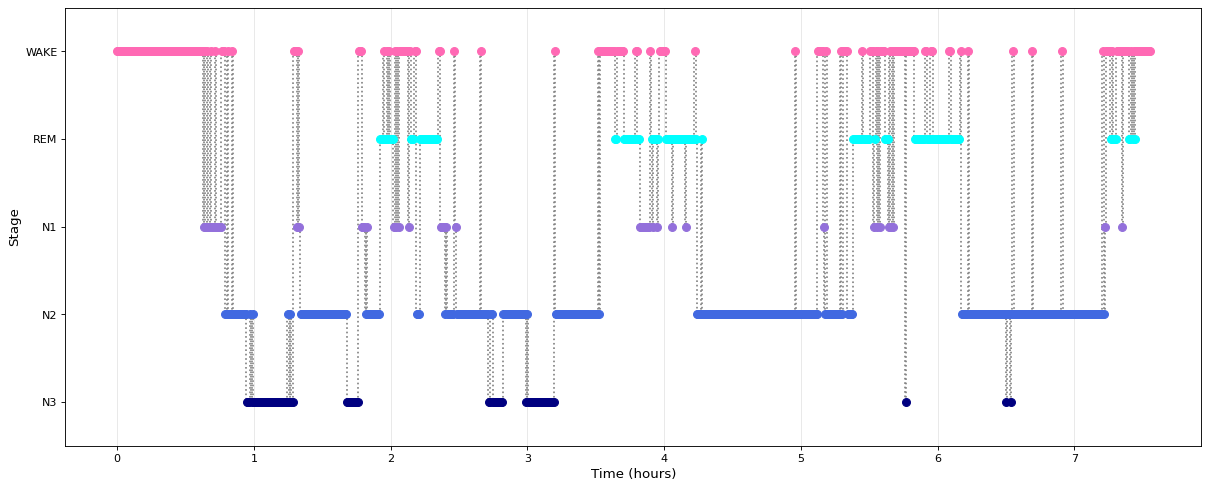

In [53]:
fig, ax = plot_hypnogram_custom(y_pred, epoch_length=30, figsize=(15, 6))

In [31]:
from yasa import sleep_statistics

In [34]:
y_pred
# transform to integer labels with w = 0, 1 = N1, 2 = N2, 3 = N3, 4 = REM
hypno_numeric = np.array([0 if stage == 'W' else 1 if stage == 'N1' else 2 if stage == 'N2' else 3 if stage == 'N3' else 4 for stage in y_pred])
hypno_numeric


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4,
       4, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 4, 0, 0, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,

In [ ]:
# Calculate the summary sleep statistics of the predicted hypnogram
yasa.sleep_statistics(hypno_numeric, sf_hyp=1/30)

{'TIB': 453.5,
 'SPT': 409.0,
 'WASO': 68.5,
 'TST': 340.5,
 'N1': 25.0,
 'N2': 207.0,
 'N3': 42.5,
 'REM': 66.0,
 'NREM': 274.5,
 'SOL': np.float64(38.0),
 'Lat_N1': np.float64(38.0),
 'Lat_N2': np.float64(47.5),
 'Lat_N3': np.float64(57.0),
 'Lat_REM': np.float64(115.5),
 '%N1': 7.342143906020558,
 '%N2': 60.79295154185022,
 '%N3': 12.481644640234949,
 '%REM': 19.383259911894275,
 '%NREM': 80.61674008810573,
 'SE': 75.0826901874311,
 'SME': 83.2518337408313}

#### Comparing sleep reports from Dreem with Yasa algorithms

In [3]:
# load example dreem data
raw_filepath = r'C:\Users\becke\Documents\PhD_NEVIA\Data_STREAM\Analysis\LMU_STREAM_ASD_001\08032024_n1_09032024_d\Night1_08032024_09032024_ASD_001\camucsleepstress_08@dreemtrial.com_2024-03-09T00-04-16[+0100].edf'
raw = mne.io.read_raw_edf(raw_filepath, preload=True, verbose=False)

In [55]:
# print info about the data
print('The channels are:', raw.ch_names)
print('The sampling frequency is:', raw.info['sfreq'])
raw

The channels are: ['Accelero Norm', 'EEG Fpz-O1', 'EEG Fpz-O2', 'EEG Fpz-F7', 'EEG F8-F7', 'EEG F7-01', 'EEG F8-O2', 'EEG Fpz-F8', 'Positiongram', 'PulseOxy Infrare', 'PulseOxy Red Hea', 'Respiration x', 'Respiration y', 'Respiration z']
The sampling frequency is: 250.0


<RawEDF | camucsleepstress_08@dreemtrial.com_2024-03-09T00-04-16[+0100].edf, 14 x 7610000 (30440.0 s), ~812.9 MiB, data loaded>

In [4]:
sls = yasa.SleepStaging(raw, eeg_name="EEG Fpz-F7", eog_name=None, emg_name=None) # include when known: metadata=dict(age=21, male=False))

In [5]:
hypno_dreem = sls.predict()
hypno_dreem

c:\Users\becke\Documents\PhD_NEVIA\CAM-LMU-ASD\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['W', 'W', 'W', ..., 'W', 'W', 'W'], shape=(1014,), dtype=object)

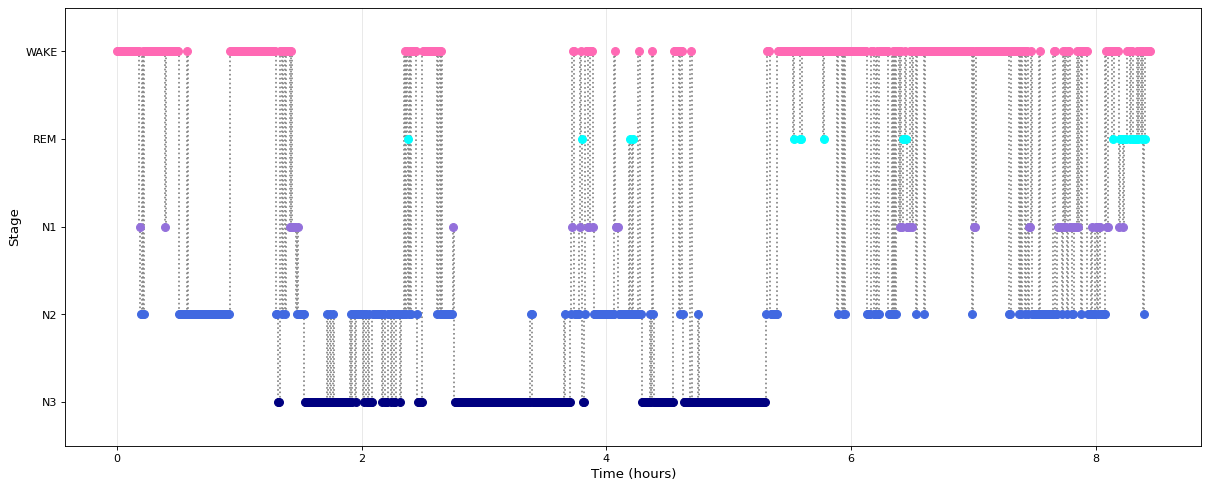

In [9]:
fig, ax = plot_hypnogram_custom(hypno_dreem, epoch_length=30, figsize=(15, 6))

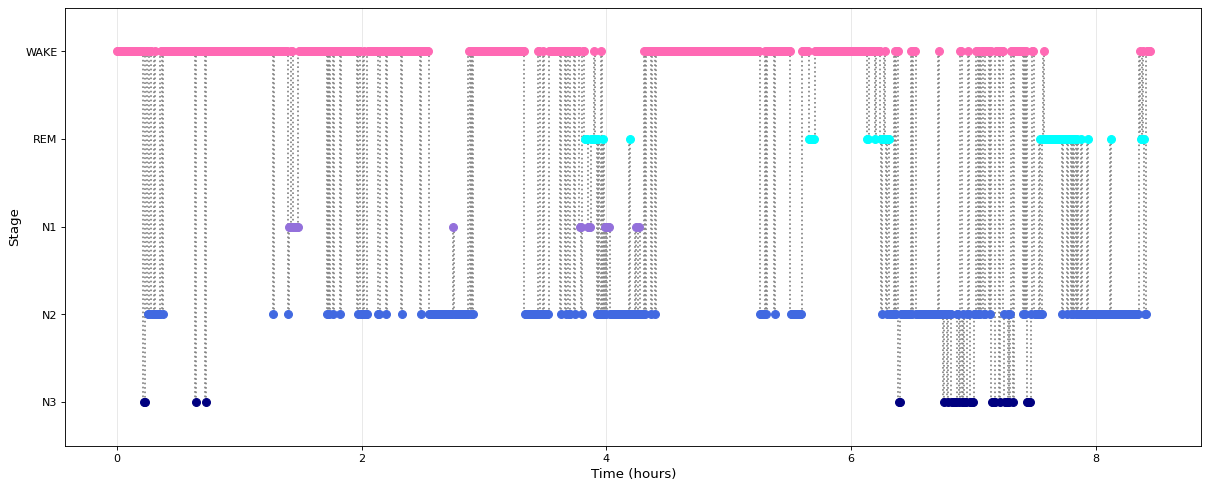

In [61]:
fig, ax = plot_hypnogram_custom(hypno_dreem, epoch_length=30, figsize=(15, 6))

In [10]:
hypno_dreem_numeric = np.array([0 if stage == 'W' else 1 if stage == 'N1' else 2 if stage == 'N2' else 3 if stage == 'N3' else 4 for stage in hypno_dreem])
hypno_dreem_numeric

array([0, 0, 0, ..., 0, 0, 0], shape=(1014,))

In [11]:
# Calculate the summary sleep statistics of the predicted hypnogram
yasa.sleep_statistics(hypno_dreem_numeric, sf_hyp=1/30)

{'TIB': 507.0,
 'SPT': 493.5,
 'WASO': 189.0,
 'TST': 304.5,
 'N1': 24.0,
 'N2': 125.0,
 'N3': 142.5,
 'REM': 13.0,
 'NREM': 291.5,
 'SOL': np.float64(11.0),
 'Lat_N1': np.float64(11.0),
 'Lat_N2': np.float64(11.5),
 'Lat_N3': np.float64(79.0),
 'Lat_REM': np.float64(142.5),
 '%N1': 7.8817733990147785,
 '%N2': 41.050903119868636,
 '%N3': 46.79802955665025,
 '%REM': 4.269293924466338,
 '%NREM': 95.73070607553366,
 'SE': 60.05917159763314,
 'SME': 61.702127659574465}

**Stage probabilities and confidence of the algorithm at each epoch**

In [14]:
# What are the predicted probabilities of each sleep stage at each epoch?
proba = sls.predict_proba()
proba

,N1,N2,N3,R,W
epoch,,,,,
0,0.007905,0.007309,0.000766,0.000184,0.983836
1,0.012236,0.010651,0.000962,0.000188,0.975963
2,0.015691,0.019024,0.026638,0.000323,0.938324
3,0.010448,0.014563,0.009447,0.000168,0.965374
4,0.004347,0.017859,0.011077,0.000264,0.966452
...,...,...,...,...,...
1009,0.245143,0.115031,0.002967,0.111540,0.525319
1010,0.032809,0.066874,0.001504,0.006027,0.892787
1011,0.023863,0.077323,0.005189,0.002430,0.891195


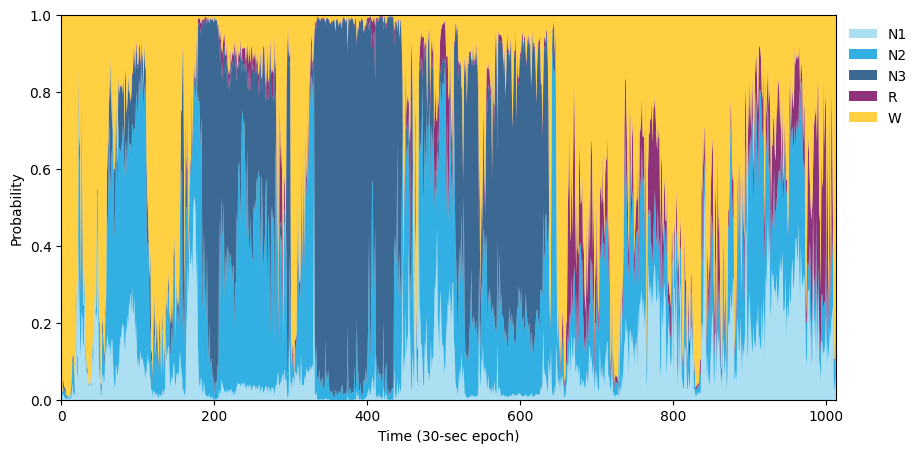

In [15]:
# Plot the predicted probabilities
sls.plot_predict_proba();

In [16]:
# From the probabilities, we can extract a confidence level (ranging from 0 to 1) for each epoch.
confidence = proba.max(1)
confidence

C:\Users\becke\AppData\Local\Temp\ipykernel_23192\354748406.py:2: Pandas4Warning: Starting with pandas version 4.0 all arguments of max will be keyword-only.
  confidence = proba.max(1)


epoch
0       0.983836
1       0.975963
2       0.938324
3       0.965374
4       0.966452
          ...   
1009    0.525319
1010    0.892787
1011    0.891195
1012    0.781723
1013    0.951161
Length: 1014, dtype: float64

**Exporting to a CSV file**

In [22]:
hypno_dreem

array(['W', 'W', 'W', ..., 'W', 'W', 'W'], shape=(1014,), dtype=object)

In [25]:
# We can also add the confidence level:
df_dreem1 = pd.DataFrame({'Hypnogram': hypno_dreem, 'Confidence': confidence})
df_dreem1

,Hypnogram,Confidence
epoch,,
0,W,0.983836
1,W,0.975963
2,W,0.938324
3,W,0.965374
4,W,0.966452
...,...,...
1009,W,0.525319
1010,W,0.892787
1011,W,0.891195


In [26]:
# Now export to a CSV file
df_dreem1.to_csv("dreem1.csv")

### Analysing my sleep: 
#### night1

In [40]:
night1_raw_filepath = r'C:\Users\becke\Documents\PhD_NEVIA\MyTests\Bitbrain\2026-02-10\E00recordingR000_EDF\dev1.edf'
night1_raw = mne.io.read_raw_edf(night1_raw_filepath, preload=True, verbose=False)
# print info about the data
print('The channels are:', night1_raw.ch_names)
print('The sampling frequency is:', night1_raw.info['sfreq'])
night1_raw

C:\Users\becke\AppData\Local\Temp\ipykernel_23192\2639843909.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  night1_raw = mne.io.read_raw_edf(night1_raw_filepath, preload=True, verbose=False)


The channels are: ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'mask_eeg', 'imu_1', 'imu_2', 'imu_3', 'imu_4', 'imu_5', 'imu_6', 'imu_7', 'imu_8', 'imu_9', 'mask_imu', 'spo_1', 'spo_2', 'spo_3', 'mask_spo']
The sampling frequency is: 256.0


<RawEDF | dev1.edf, 20 x 6277120 (24520.0 s), ~957.8 MiB, data loaded>

In [41]:
night1_sls = yasa.SleepStaging(night1_raw, eeg_name="eeg_1", eog_name=None, emg_name=None, metadata=dict(age=28, male=False)) # include when known: metadata=dict(age=21, male=False))
night1_hypno = night1_sls.predict()
night1_hypno

c:\Users\becke\Documents\PhD_NEVIA\CAM-LMU-ASD\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'N1', 'N2', 'W', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'W', 'W', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'W',
       'W', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N2', 'N3', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',

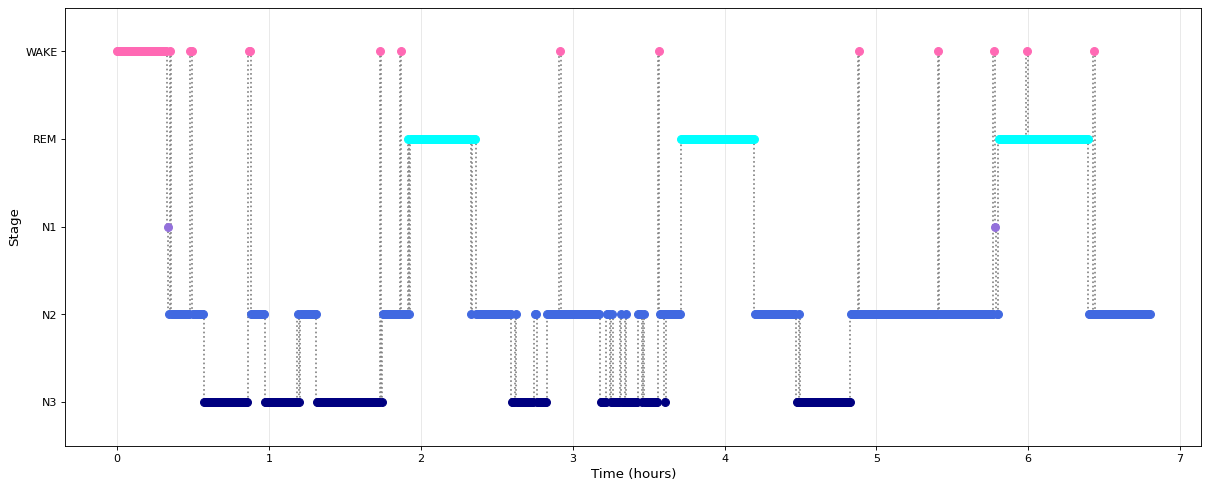

In [42]:
fig, ax = plot_hypnogram_custom(night1_hypno, epoch_length=30, figsize=(15, 6))

In [43]:
night1_hypno_numeric = np.array([0 if stage == 'W' else 1 if stage == 'N1' else 2 if stage == 'N2' else 3 if stage == 'N3' else 4 for stage in night1_hypno])
# Calculate the summary sleep statistics of the predicted hypnogram
yasa.sleep_statistics(night1_hypno_numeric, sf_hyp=1/30)

{'TIB': 408.5,
 'SPT': 388.5,
 'WASO': 7.0,
 'TST': 381.5,
 'N1': 1.0,
 'N2': 182.0,
 'N3': 108.5,
 'REM': 90.0,
 'NREM': 291.5,
 'SOL': np.float64(20.0),
 'Lat_N1': np.float64(20.0),
 'Lat_N2': np.float64(20.5),
 'Lat_N3': np.float64(34.5),
 'Lat_REM': np.float64(115.0),
 '%N1': 0.2621231979030144,
 '%N2': 47.706422018348626,
 '%N3': 28.440366972477065,
 '%REM': 23.591087811271297,
 '%NREM': 76.4089121887287,
 'SE': 93.39045287637698,
 'SME': 98.1981981981982}

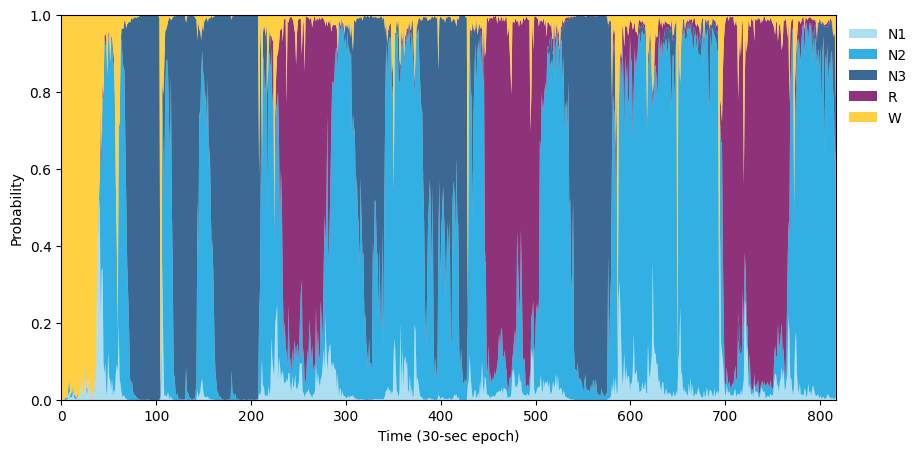

In [44]:
# Plot the predicted probabilities
night1_sls.plot_predict_proba();

In [45]:
# What are the predicted probabilities of each sleep stage at each epoch?
night1_proba = night1_sls.predict_proba()
# From the probabilities, we can extract a confidence level (ranging from 0 to 1) for each epoch.
night1_confidence = night1_proba.max(1)
# We can also add the confidence level:
df_night1 = pd.DataFrame({'Hypnogram': night1_hypno, 'Confidence': night1_confidence})
# Now export to a CSV file
df_night1.to_csv("night1.csv")

C:\Users\becke\AppData\Local\Temp\ipykernel_23192\2118463618.py:4: Pandas4Warning: Starting with pandas version 4.0 all arguments of max will be keyword-only.
  night1_confidence = night1_proba.max(1)


### Analysing my sleep: 
#### night2

In [34]:
night2_raw_filepath = r'C:\Users\becke\Documents\PhD_NEVIA\MyTests\Bitbrain\2026-02-11\E00recordingR000_EDF\dev1.edf'
night2_raw = mne.io.read_raw_edf(night2_raw_filepath, preload=True, verbose=False)
# print info about the data
print('The channels are:', night2_raw.ch_names)
print('The sampling frequency is:', night2_raw.info['sfreq'])
night2_raw

C:\Users\becke\AppData\Local\Temp\ipykernel_23192\4040737648.py:2: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  night2_raw = mne.io.read_raw_edf(night2_raw_filepath, preload=True, verbose=False)


The channels are: ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'mask_eeg', 'imu_1', 'imu_2', 'imu_3', 'imu_4', 'imu_5', 'imu_6', 'imu_7', 'imu_8', 'imu_9', 'mask_imu', 'spo_1', 'spo_2', 'spo_3', 'mask_spo']
The sampling frequency is: 256.0


<RawEDF | dev1.edf, 20 x 7668992 (29957.0 s), ~1.14 GiB, data loaded>

In [35]:
night2_sls = yasa.SleepStaging(night2_raw, eeg_name="eeg_1", eog_name=None, emg_name=None, metadata=dict(age=28, male=False)) # include when known: metadata=dict(age=21, male=False))
night2_hypno = night2_sls.predict()
night2_hypno

c:\Users\becke\Documents\PhD_NEVIA\CAM-LMU-ASD\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'N1', 'N1', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3',
       'N2', 'N3', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'W', 'N3', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'W', 'W', 'W', 'W', 'N1', 'N1', 'N

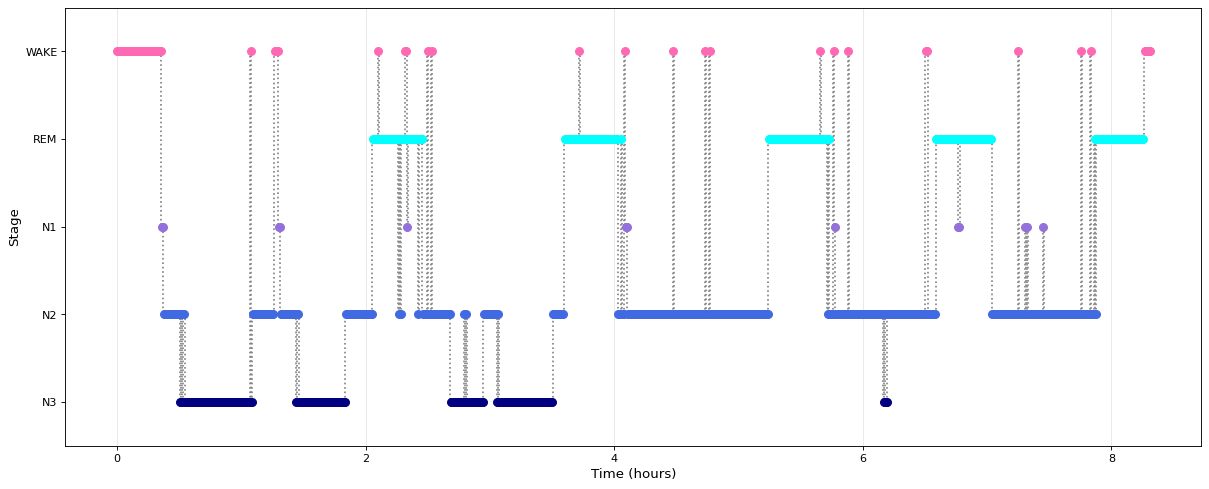

In [36]:
fig, ax = plot_hypnogram_custom(night2_hypno, epoch_length=30, figsize=(15, 6))

In [37]:
night2_hypno_numeric = np.array([0 if stage == 'W' else 1 if stage == 'N1' else 2 if stage == 'N2' else 3 if stage == 'N3' else 4 for stage in night2_hypno])
# Calculate the summary sleep statistics of the predicted hypnogram
yasa.sleep_statistics(night2_hypno_numeric, sf_hyp=1/30)

{'TIB': 499.0,
 'SPT': 474.5,
 'WASO': 11.5,
 'TST': 463.0,
 'N1': 6.5,
 'N2': 233.0,
 'N3': 99.0,
 'REM': 124.5,
 'NREM': 338.5,
 'SOL': np.float64(21.5),
 'Lat_N1': np.float64(21.5),
 'Lat_N2': np.float64(22.5),
 'Lat_N3': np.float64(30.5),
 'Lat_REM': np.float64(123.5),
 '%N1': 1.4038876889848813,
 '%N2': 50.323974082073434,
 '%N3': 21.382289416846653,
 '%REM': 26.889848812095032,
 '%NREM': 73.11015118790496,
 'SE': 92.78557114228457,
 'SME': 97.57639620653319}

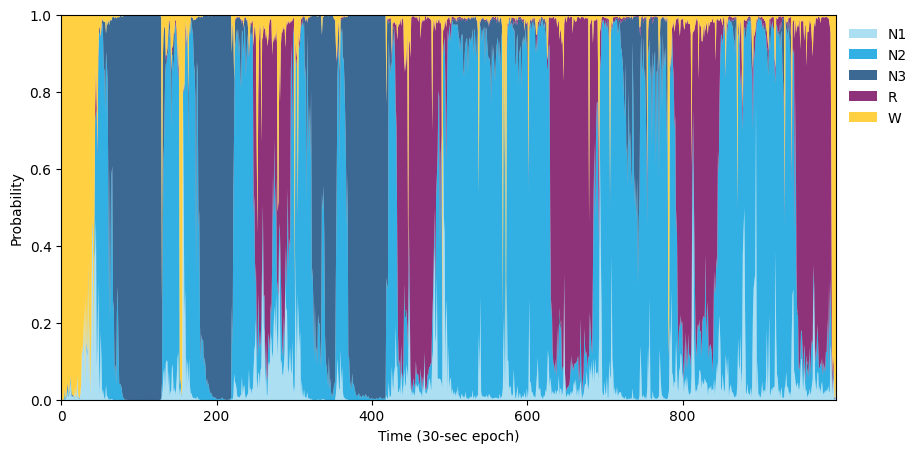

In [38]:
# Plot the predicted probabilities
night2_sls.plot_predict_proba();

In [39]:
# What are the predicted probabilities of each sleep stage at each epoch?
night2_proba = night2_sls.predict_proba()
# From the probabilities, we can extract a confidence level (ranging from 0 to 1) for each epoch.
night2_confidence = night2_proba.max(1)
# We can also add the confidence level:
df_night2 = pd.DataFrame({'Hypnogram': night2_hypno, 'Confidence': night2_confidence})
# Now export to a CSV file
df_night2.to_csv("night2.csv")

C:\Users\becke\AppData\Local\Temp\ipykernel_23192\671628196.py:4: Pandas4Warning: Starting with pandas version 4.0 all arguments of max will be keyword-only.
  night2_confidence = night2_proba.max(1)
